In [166]:
import pandas as pd
import nltk
import sklearn
import numpy as np

In [335]:
class Model():
    
    def __init__(self, file, norm=True):
        '''
        Model of Classifing massages
        imput: file -- name of file (str)
               norm -- using stemming (boolean)
        '''
        
        # считываем данные из файла
        self.df_train = pd.read_excel(file, sheet_name='Training data')
        self.df_test = pd.read_excel(file, sheet_name='Test data')
        
        # объединяем датасеты
        self.df = pd.concat([self.df_train, self.df_test], ignore_index=True)
        
        #
        if norm == True:
            self.train_text = self.stemming(self.df_train['Пример текста'])
            self.test_text = self.stemming(self.df_test['Пример текста'])
            self.text = self.stemming(self.df['Пример текста'])
        else:
            self.train_text = self.df_train['Пример текста']
            self.test_text = self.df_test['Пример текста']
            self.text = self.df['Пример текста']
        
        #print(len(self.train_text), len(self.test_text), len(self.df))
        
        self.train_target = self.df_train['Класс']
        self.test_target = self.df_test['Класс']
        
        self.categories = []
        for t in self.train_target:
            if t not in self.categories:
                print(t)
                self.categories.append(t)
        
        
        self.x_train, self.x_test = self.text_to_matrix(self.text)
        #print(self.x_train, self.x_test)
        
        self.y_train = self.make_num_target(self.train_target)
        self.y_test = self.make_num_target(self.test_target)
        
        self.feauter_names = self.count.get_feature_names()
        print('Количество признаков: {}'.format(len(feauter_names)))
        
    def fit(self):
        '''
        Learn the model
        '''
        # один против остальных
        from sklearn.svm import LinearSVC
        self.linear_svm = LinearSVC()
        self.linear_svm.fit(x_train, y_train)
        print('Правильность на обучающем наборе: ', linear_svm.score(x_train, y_train))
        print('Правильность на тестовом наборе: ', linear_svm.score(x_test, y_test))
        self.predictions = self.linear_svm.predict(x_test)
        
    def predict(self, text):
        '''
        Make a prediction
        '''
        text = self.stemming(pd.Series([text]))
        x = self.count.transform(text)
        answer = self.linear_svm.predict(x)[0]
        print('Предсказание:', self.categories[answer])
        return answer
        
    def presentation(self):
        for text, p, y in zip(self.test_text, self.predictions, self.y_test):
            if p == y:
                r = 'Right'
            else:
                r = 'Wrong'
            print(text, self.categories[p], r)
        
    def stemming(self, texts):
        from nltk.stem.snowball import SnowballStemmer
        stemmer = SnowballStemmer('russian')
        new_texts = []
        for t in texts:
            words = t.split(' ')
            tt = ' '.join([stemmer.stem(word) for word in words])
            new_texts.append(tt)
        #print(len(new_texts))
        return pd.Series(new_texts)
                
    def text_to_matrix(self, text):
        from sklearn.feature_extraction.text import CountVectorizer
        self.count = CountVectorizer()
        X = self.count.fit_transform(text)
        self.voc = self.count.vocabulary_
        x = X.toarray()
        x_train = x[0:len(self.train_text),:]
        #print(len(self.train_text), len(self.df))
        x_test = x[len(self.train_text):len(self.train_text)+len(self.test_text),:]
        return x_train, x_test
        
    def make_num_target(self, target):
        y = []
        for t in target:
            for n in range(0, len(self.categories)):
                if t == self.categories[n]:
                    y.append(n)           
        return np.array(y)
    
model = Model('Test.xlsx', norm=True)
model.fit()
model.predict('я врач и хочу зарплату и отдыхать на выходных с доктором')

VACATION-REQUEST
SALARY-REQUEST
SICK-LEAVE-REPORT
Количество признаков: 83
Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.9166666666666666
Предсказание: SICK-LEAVE-REPORT


2

In [322]:
x_train = model.x_train
x_test = model.x_test
y_train = model.y_train
y_test = model.y_test
feauter_names = model.feauter_names

In [260]:
print('Размер обучающего множества', x_train.shape)
print('Размер ответов обучающего множества', y_train.shape)
print('Размер тренироврочного множества', x_test.shape)
print('Размер ответов тренироврочного множества', y_test.shape)

Размер обучающего множества (32, 83)
Размер ответов обучающего множества (32,)
Размер тренироврочного множества (12, 83)
Размер ответов тренироврочного множества (12,)


In [261]:
feauter_names

['апреле',
 'бльничн',
 'бол',
 'больничн',
 'буд',
 'бы',
 'был',
 'взят',
 'врач',
 'всег',
 'выходн',
 'где',
 'голов',
 'горл',
 'дадут',
 'два',
 'декабр',
 'денег',
 'дне',
 'дня',
 'доктор',
 'за',
 'заболел',
 'заплат',
 'заработа',
 'зарплат',
 'зраплат',
 'как',
 'когд',
 'ли',
 'лист',
 'листок',
 'мал',
 'март',
 'мен',
 'месяц',
 'мне',
 'можн',
 'на',
 'не',
 'недел',
 'нуж',
 'нужн',
 'октябр',
 'оптуск',
 'отгул',
 'отдохн',
 'отдохнут',
 'отдыха',
 'отпуск',
 'очен',
 'пар',
 'переведут',
 'плох',
 'по',
 'пойд',
 'получ',
 'понедельник',
 'посет',
 'посмотрет',
 'поч',
 'прид',
 'придет',
 'пришл',
 'прошл',
 'работ',
 'работу',
 'рассетн',
 'расчетн',
 'себ',
 'сегодн',
 'скольк',
 'след',
 'сход',
 'так',
 'температур',
 'турц',
 'уйд',
 'улетет',
 'хоч',
 'чувств',
 'эт',
 'январе']

In [279]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(x_train)
X_pca_test = pca.transform(x_test)
X_pca_test

array([[ 0.62159719,  0.13868672],
       [-0.36039567,  0.35092532],
       [-0.62613506,  0.06273224],
       [ 0.82876071,  0.64256913],
       [ 0.03199969, -0.74079738],
       [ 0.06971229, -0.25619949],
       [-0.46801892,  0.07158813],
       [-0.63305726,  0.0492645 ],
       [-0.58743092,  1.239274  ],
       [ 0.52225477, -0.15583712],
       [ 0.54218691,  0.07193652],
       [ 0.20983195, -0.19528622]])

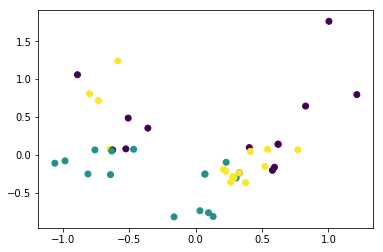

In [283]:
plt.scatter(X_pca_train[:,0], X_pca_train[:,1], c=y_train)
plt.scatter(X_pca_test[:,0], X_pca_test[:,1], c=y_test)

In [317]:
# гребневая регрессия
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
predict_ridge = ridge.predict(x_test)
print('Правильность на обучающем наборе: ', ridge.score(x_train, y_train))
print('Правильность на тестовом наборе: ', ridge.score(x_test, y_test))

Правильность на обучающем наборе:  0.9261641511892346
Правильность на тестовом наборе:  0.4749598870775623


In [319]:
# гребневая регрессия - исследование
scores = []
for a in range(1,100):
    ridge = Ridge(alpha=0.01*a)
    ridge.fit(x_train, y_train)
    predict_ridge = ridge.predict(x_test)
    #print('Правильность на обучающем наборе: ', ridge.score(x_train, y_train))
    print('Правильность на тестовом наборе: ', ridge.score(x_test, y_test))
    scores.append(ridge.score(x_test, y_test))

Правильность на тестовом наборе:  0.6056162767683216
Правильность на тестовом наборе:  0.6040725602626947
Правильность на тестовом наборе:  0.6025286313353204
Правильность на тестовом наборе:  0.6009847117725281
Правильность на тестовом наборе:  0.599441043877897
Правильность на тестовом наборе:  0.5978978842830767
Правильность на тестовом наборе:  0.596355498917479
Правильность на тестовом наборе:  0.5948141589264144
Правильность на тестовом наборе:  0.5932741373675748
Правильность на тестовом наборе:  0.5917357065477937
Правильность на тестовом наборе:  0.5901991358875139
Правильность на тестовом наборе:  0.5886646902208582
Правильность на тестовом наборе:  0.5871326284556844
Правильность на тестовом наборе:  0.5856032025313322
Правильность на тестовом наборе:  0.5840766566226098
Правильность на тестовом наборе:  0.5825532265474086
Правильность на тестовом наборе:  0.5810331393425783
Правильность на тестовом наборе:  0.5795166129786337
Правильность на тестовом наборе:  0.578003856188

In [320]:
# Лассо
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
predict_lasso = lasso.predict(x_test)
print('Правильность на обучающем наборе: ', lasso.score(x_train, y_train))
print('Правильность на тестовом наборе: ', lasso.score(x_test, y_test))

Правильность на обучающем наборе:  0.0
Правильность на тестовом наборе:  -0.00146484375


In [314]:
# один против остальных
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(x_train, y_train)
predict_svm = linear_svm.predict(x_test)
print('Правильность на обучающем наборе: ', linear_svm.score(x_train, y_train))
print('Правильность на тестовом наборе: ', linear_svm.score(x_test, y_test))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.9166666666666666


In [309]:
# нейронные сети
from sklearn.neural_network import MLPClassifier
mpl = MLPClassifier(solver='lbfgs', max_iter=10, alpha=1, random_state=3)
mpl.fit(x_train, y_train)
predict_mpl = mpl.predict(x_test)
print('Правильность на обучающем наборе: ', mpl.score(x_train, y_train))
print('Правильность на тестовом наборе: ', mpl.score(x_test, y_test))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.9166666666666666


In [294]:
# нейронные сети
score = []
for n in range(1,100):
    mpl = MLPClassifier(solver='lbfgs', random_state=3, hidden_layer_sizes=n)
    mpl.fit(x_train, y_train)
    score_mpl = mpl.score(x_test, y_test)
    s = mpl.score(x_test, y_test)
    print('Число скрытых слоёв: ', n, 'Число очков: ', s)
    scores.append(s)

Число скрытых слоёв:  1 Число очков:  0.5833333333333334
Число скрытых слоёв:  2 Число очков:  0.6666666666666666
Число скрытых слоёв:  3 Число очков:  0.8333333333333334
Число скрытых слоёв:  4 Число очков:  0.75
Число скрытых слоёв:  5 Число очков:  0.8333333333333334
Число скрытых слоёв:  6 Число очков:  0.9166666666666666
Число скрытых слоёв:  7 Число очков:  0.9166666666666666
Число скрытых слоёв:  8 Число очков:  0.9166666666666666
Число скрытых слоёв:  9 Число очков:  0.9166666666666666
Число скрытых слоёв:  10 Число очков:  0.8333333333333334
Число скрытых слоёв:  11 Число очков:  0.9166666666666666
Число скрытых слоёв:  12 Число очков:  0.8333333333333334
Число скрытых слоёв:  13 Число очков:  0.9166666666666666
Число скрытых слоёв:  14 Число очков:  0.9166666666666666
Число скрытых слоёв:  15 Число очков:  0.9166666666666666
Число скрытых слоёв:  16 Число очков:  0.8333333333333334
Число скрытых слоёв:  17 Число очков:  0.8333333333333334
Число скрытых слоёв:  18 Число очков:

In [305]:
# нейронные сети
score = []
for n in range(1,11):
    for i in range(1,100):
        mpl = MLPClassifier(solver='lbfgs', random_state=3, hidden_layer_sizes=n, max_iter=i)
        mpl.fit(x_train, y_train)
        score_mpl = mpl.score(x_test, y_test)
        s = mpl.score(x_test, y_test)
        print('Максимальное число итераций: ', i, 'Число слоёв: ', n, 'Правильность: ', s)
        scores.append(s)

Максимальное число итераций:  1 Число слоёв:  1 Правильность:  0.3333333333333333
Максимальное число итераций:  2 Число слоёв:  1 Правильность:  0.3333333333333333
Максимальное число итераций:  3 Число слоёв:  1 Правильность:  0.3333333333333333
Максимальное число итераций:  4 Число слоёв:  1 Правильность:  0.3333333333333333
Максимальное число итераций:  5 Число слоёв:  1 Правильность:  0.25
Максимальное число итераций:  6 Число слоёв:  1 Правильность:  0.5
Максимальное число итераций:  7 Число слоёв:  1 Правильность:  0.5833333333333334
Максимальное число итераций:  8 Число слоёв:  1 Правильность:  0.5833333333333334
Максимальное число итераций:  9 Число слоёв:  1 Правильность:  0.5833333333333334
Максимальное число итераций:  10 Число слоёв:  1 Правильность:  0.5833333333333334
Максимальное число итераций:  11 Число слоёв:  1 Правильность:  0.5833333333333334
Максимальное число итераций:  12 Число слоёв:  1 Правильность:  0.5833333333333334
Максимальное число итераций:  13 Число сло

Максимальное число итераций:  10 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  11 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  12 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  13 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  14 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  15 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  16 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  17 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  18 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  19 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  20 Число слоёв:  2 Правильность:  0.6666666666666666
Максимальное число итераций:  21 Число слоёв:  2 Правильность:  0.6666666666666666
Макс

Максимальное число итераций:  17 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  18 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  19 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  20 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  21 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  22 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  23 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  24 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  25 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  26 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  27 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  28 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  29 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  30 Число слоёв:  4 Правильность:  0.75
Максимальное число итераций:  31 Ч

Максимальное число итераций:  35 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  36 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  37 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  38 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  39 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  40 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  41 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  42 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  43 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  44 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  45 Число слоёв:  5 Правильность:  0.8333333333333334
Максимальное число итераций:  46 Число слоёв:  5 Правильность:  0.8333333333333334
Макс

Максимальное число итераций:  43 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  44 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  45 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  46 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  47 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  48 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  49 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  50 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  51 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  52 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  53 Число слоёв:  6 Правильность:  0.9166666666666666
Максимальное число итераций:  54 Число слоёв:  6 Правильность:  0.9166666666666666
Макс

Максимальное число итераций:  51 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  52 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  53 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  54 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  55 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  56 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  57 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  58 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  59 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  60 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  61 Число слоёв:  7 Правильность:  0.9166666666666666
Максимальное число итераций:  62 Число слоёв:  7 Правильность:  0.9166666666666666
Макс

Максимальное число итераций:  57 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  58 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  59 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  60 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  61 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  62 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  63 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  64 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  65 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  66 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  67 Число слоёв:  8 Правильность:  0.9166666666666666
Максимальное число итераций:  68 Число слоёв:  8 Правильность:  0.9166666666666666
Макс

Максимальное число итераций:  66 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  67 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  68 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  69 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  70 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  71 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  72 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  73 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  74 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  75 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  76 Число слоёв:  9 Правильность:  0.9166666666666666
Максимальное число итераций:  77 Число слоёв:  9 Правильность:  0.9166666666666666
Макс

Максимальное число итераций:  66 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  67 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  68 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  69 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  70 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  71 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  72 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  73 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  74 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  75 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  76 Число слоёв:  10 Правильность:  0.8333333333333334
Максимальное число итераций:  77 Число слоёв:  10 Правильность:  0.833333333

In [311]:
# логичтическая регрессия
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.predict(x_test)
print('Правильность на обучающем наборе: ', lr.score(x_train, y_train))
print('Правильность на тестовом наборе: ', lr.score(x_test, y_test))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.8333333333333334


In [312]:
# линейная регрессия
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.predict(x_test)
print('Правильность на обучающем наборе: ', lr.score(x_train, y_train))
print('Правильность на тестовом наборе: ', lr.score(x_test, y_test))

Правильность на обучающем наборе:  1.0
Правильность на тестовом наборе:  0.8333333333333334


In [264]:
# к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
n_classes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for n in n_classes:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    s = clf.score(x_test, y_test)
    print('Число соседей: ', n, 'Число очков: ', s)
    scores.append(s)

Число соседей:  1 Число очков:  0.6666666666666666
Число соседей:  2 Число очков:  0.6666666666666666
Число соседей:  3 Число очков:  0.6666666666666666
Число соседей:  4 Число очков:  0.5833333333333334
Число соседей:  5 Число очков:  0.5833333333333334
Число соседей:  6 Число очков:  0.6666666666666666
Число соседей:  7 Число очков:  0.75
Число соседей:  8 Число очков:  0.6666666666666666
Число соседей:  9 Число очков:  0.6666666666666666
Число соседей:  10 Число очков:  0.6666666666666666
Число соседей:  11 Число очков:  0.75
Число соседей:  12 Число очков:  0.5833333333333334
Число соседей:  13 Число очков:  0.5833333333333334
Число соседей:  14 Число очков:  0.5833333333333334
Число соседей:  15 Число очков:  0.3333333333333333


In [265]:
# один против остальных
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(x_train, y_train)
predict_svm = linear_svm.predict(x_test)
score_svm = linear_svm.score(x_test, y_test)
print(score_svm)

0.9166666666666666


In [266]:
# наивный байес - 
from sklearn.naive_bayes import GaussianNB
bayes_gaus = GaussianNB()
bayes_gaus.fit(x_train, y_train)
predict_bayes_gaus = bayes_gaus.predict(x_test)
score_bayes_gaus = bayes_gaus.score(x_test, y_test)
print(score_bayes_gaus)

0.75


In [267]:
# наивный байес - 
from sklearn.naive_bayes import BernoulliNB
bayes_bernulli = BernoulliNB()
bayes_bernulli.fit(x_train, y_train)
predict_bayes_bernulli = bayes_bernulli.predict(x_test)
score_bayes_bernulli = bayes_bernulli.score(x_test, y_test)
print(score_bayes_bernulli)

0.8333333333333334


In [268]:
# наивный байес - 
from sklearn.naive_bayes import MultinomialNB
bayes_multi = MultinomialNB()
bayes_multi.fit(x_train, y_train)
predict_bayes_multi = bayes_multi.predict(x_test)
score_bayes_multi = bayes_multi.score(x_test, y_test)
print(score_bayes_multi)

0.8333333333333334


In [272]:
# деревья решений
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1, max_depth=5)
tree.fit(x_train, y_train)
predict_tree = tree.predict(x_test)
print('Правильность на обучающем множестве', tree.score(x_train, y_train))
print('Правильность на тестовом множестве', tree.score(x_test, y_test))
print('Важность признаков: ')
for name, score_imp in zip(feauter_names, tree.feature_importances_):
    print(name, score_imp)

Правильность на обучающем множестве 0.8125
Правильность на тестовом множестве 0.75
Важность признаков: 
апреле 0.0
бльничн 0.0
бол 0.0
больничн 0.0
буд 0.0
бы 0.0
был 0.0
взят 0.0
врач 0.0
всег 0.0
выходн 0.0
где 0.0
голов 0.0
горл 0.0
дадут 0.0
два 0.0
декабр 0.0
денег 0.0
дне 0.0
дня 0.0
доктор 0.0
за 0.0
заболел 0.0
заплат 0.19595528849260196
заработа 0.0
зарплат 0.1959552884926021
зраплат 0.0
как 0.0
когд 0.0
ли 0.0
лист 0.0
листок 0.0
мал 0.0
март 0.0
мен 0.0
месяц 0.0
мне 0.0
можн 0.0
на 0.0
не 0.0
недел 0.0
нуж 0.0
нужн 0.0
октябр 0.0
оптуск 0.0
отгул 0.0
отдохн 0.0
отдохнут 0.0
отдыха 0.0
отпуск 0.239232409381663
очен 0.0
пар 0.0
переведут 0.0
плох 0.0
по 0.0
пойд 0.0
получ 0.0
понедельник 0.0
посет 0.0
посмотрет 0.0
поч 0.0
прид 0.0
придет 0.0
пришл 0.0
прошл 0.0
работ 0.0
работу 0.0
рассетн 0.0
расчетн 0.2038420338498894
себ 0.0
сегодн 0.0
скольк 0.16501497978324361
след 0.0
сход 0.0
так 0.0
температур 0.0
турц 0.0
уйд 0.0
улетет 0.0
хоч 0.0
чувств 0.0
эт 0.0
январе 0.0


In [273]:
n_max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for n in n_max_depth:
    tree = DecisionTreeClassifier(max_depth=n)
    tree.fit(x_train, y_train)
    s = tree.score(x_test, y_test)
    print('Максимальная глубина: ', n, 'Правильность: ', s)
    scores.append(s)

Максимальная глубина:  1 Правильность:  0.5
Максимальная глубина:  2 Правильность:  0.5833333333333334
Максимальная глубина:  3 Правильность:  0.5833333333333334
Максимальная глубина:  4 Правильность:  0.75
Максимальная глубина:  5 Правильность:  0.75
Максимальная глубина:  6 Правильность:  0.75
Максимальная глубина:  7 Правильность:  0.6666666666666666
Максимальная глубина:  8 Правильность:  0.6666666666666666
Максимальная глубина:  9 Правильность:  0.5833333333333334
Максимальная глубина:  10 Правильность:  0.5833333333333334
Максимальная глубина:  11 Правильность:  0.5833333333333334
Максимальная глубина:  12 Правильность:  0.6666666666666666
Максимальная глубина:  13 Правильность:  0.5833333333333334
Максимальная глубина:  14 Правильность:  0.5833333333333334
Максимальная глубина:  15 Правильность:  0.5833333333333334


In [275]:
# случайный лес
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=1)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [277]:
scores = []
for n in range(10,100):
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(x_train, y_train)
    s = tree.score(x_test, y_test)
    print('Число деревьев: ', n, 'Правильность: ', s)
    scores.append(s)

Число деревьев:  10 Правильность:  0.5833333333333334
Число деревьев:  11 Правильность:  0.5833333333333334
Число деревьев:  12 Правильность:  0.5833333333333334
Число деревьев:  13 Правильность:  0.5833333333333334
Число деревьев:  14 Правильность:  0.5833333333333334
Число деревьев:  15 Правильность:  0.5833333333333334
Число деревьев:  16 Правильность:  0.5833333333333334
Число деревьев:  17 Правильность:  0.5833333333333334
Число деревьев:  18 Правильность:  0.5833333333333334
Число деревьев:  19 Правильность:  0.5833333333333334
Число деревьев:  20 Правильность:  0.5833333333333334
Число деревьев:  21 Правильность:  0.5833333333333334
Число деревьев:  22 Правильность:  0.5833333333333334
Число деревьев:  23 Правильность:  0.5833333333333334
Число деревьев:  24 Правильность:  0.5833333333333334
Число деревьев:  25 Правильность:  0.5833333333333334
Число деревьев:  26 Правильность:  0.5833333333333334
Число деревьев:  27 Правильность:  0.5833333333333334
Число деревьев:  28 Правильн

In [310]:
from sklearn.model_selection import GridSearchCV as GCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GCV(LR(), param_grid, cv=5)
grid.fit(x_train, y_train)
print('Наилучшее значение перекрёстной переменной: ', grid.best_score_)
print('Наилучшие параметры: ', grid.best_params_)

Наилучшее значение перекрёстной переменной:  0.84375
Наилучшие параметры:  {'C': 10}


In [50]:
feauter_names = count.get_feature_names()
print('Количество признаков: {}'.format(len(feauter_names)))

Количество признаков: 68


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression as LR
scores = cross_val_score(LR(), x_train, y_train, cv=5)
print('Средняя правильность перекрёстной оценки: {:.2f}'.format(np.mean(scores)))

Средняя правильность перекрёстной оценки: 0.81


In [52]:
from sklearn.model_selection import GridSearchCV as GCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GCV(LR(), param_grid, cv=5)
grid.fit(x_train, y_train)
print('Наилучшее значение перекрёстной переменной: ', grid.best_score_)
print('Наилучшие параметры: ', grid.best_params_)

Наилучшее значение перекрёстной переменной:  0.875
Наилучшие параметры:  {'C': 10}
